In [17]:
#Original Example: https://docs.pymc.io/notebooks/GLM-linear.html
%matplotlib inline

from pymc3 import  *

import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Create some toy data

size = 1000
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)

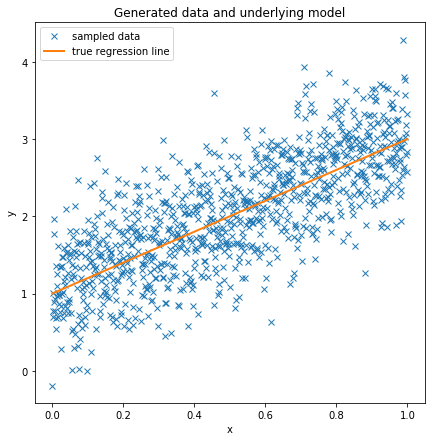

In [5]:
# plot the toy data
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

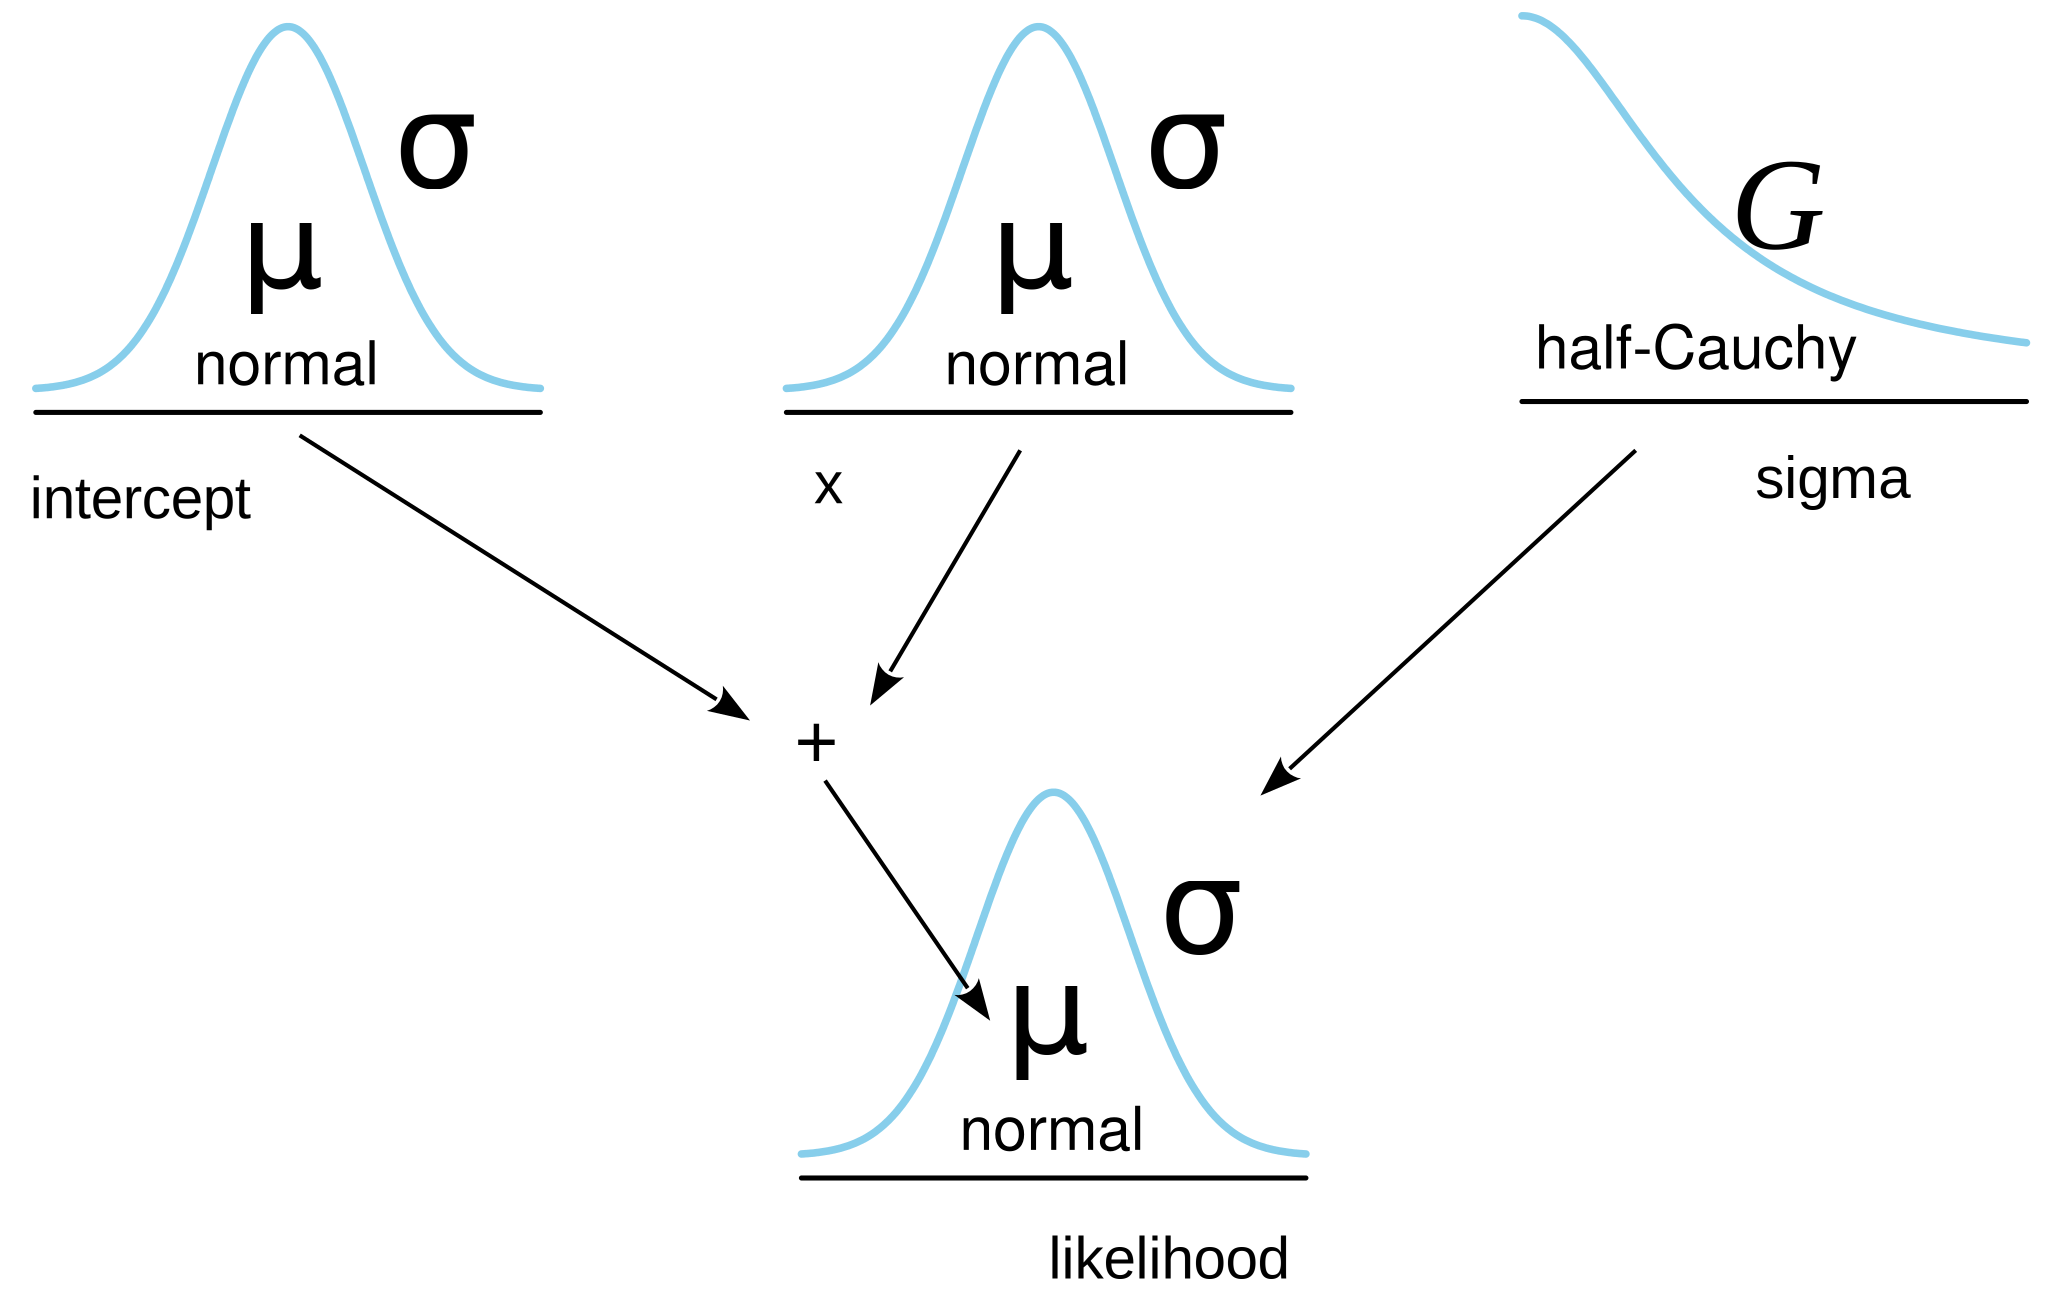

In [15]:
from IPython.core.display import SVG
SVG(filename='LinearRegression.svg')

In [16]:
# doing a baysian analysis to 'recover' the true line given the data 
# (imagine we just had the data, but not true_intercept or true_slope)

with Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy('sigma', beta=10, testval=1.)
    intercept = Normal('Intercept', 0, sigma=20)
    x_coeff = Normal('x', 0, sigma=20)

    # Define likelihood
    likelihood = Normal('y', mu=intercept + x_coeff * x,
                        sigma=sigma, observed=y)

    # Inference!
    trace = sample(3000, cores=4) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x, Intercept, sigma]
Sampling 4 chains: 100%|██████████| 14000/14000 [00:04<00:00, 2830.46draws/s]
The acceptance probability does not match the target. It is 0.8908039088198485, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8844089791039479, but should be close to 0.8. Try to increase the number of tuning steps.


Note: the original example talked about a 'shortcut' called glm that takes 'patsy' functions: https://patsy.readthedocs.io/en/latest/overview.html

## Analyzing the model
Bayesian inference does not give us only one best fitting line (as maximum likelihood does) but rather a whole posterior distribution of likely parameters. Lets plot the posterior distribution of our parameters and the individual samples we drew.


/Users/m102417/anaconda3/lib/python3.6/site-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))
/Users/m102417/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 504x504 with 0 Axes>

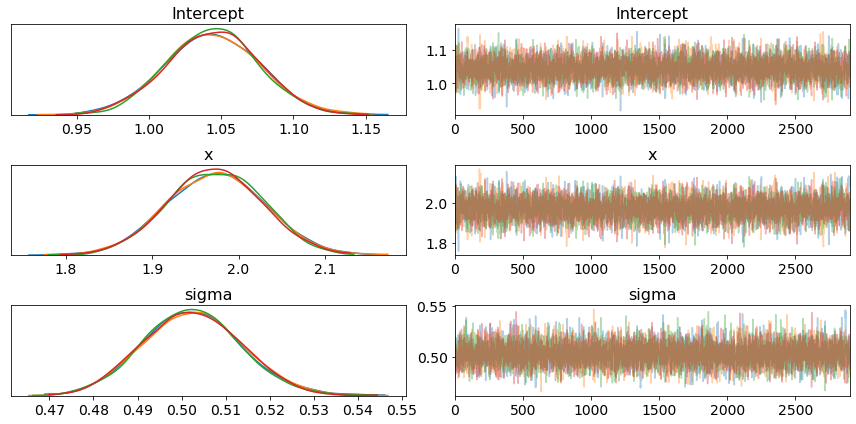

In [18]:
plt.figure(figsize=(7, 7))
traceplot(trace[100:])
plt.tight_layout();

The left side shows our marginal posterior – for each parameter value on the x-axis we get a probability on the y-axis that tells us how likely that parameter value is.

There are a couple of things to see here. The first is that our sampling chains for the individual parameters (left side) seem well converged and stationary (there are no large drifts or other odd patterns).

Secondly, the maximum posterior estimate of each variable (the peak in the left side distributions) is very close to the true parameters used to generate the data (x is the regression coefficient and sigma is the standard deviation of our normal).

In the GLM we thus do not only have one best fitting regression line, but many. A posterior predictive plot takes multiple samples from the posterior (intercepts and slopes) and plots a regression line for each of them. Here we are using the plot_posterior_predictive_glm() convenience function for this.

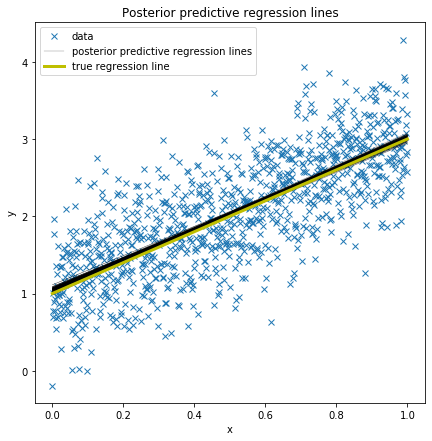

In [20]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'x', label='data')
plot_posterior_predictive_glm(trace, samples=100,
                              label='posterior predictive regression lines')
plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');

As you can see, our estimated regression lines are very similar to the true regression line. But since we only have limited data we have uncertainty in our estimates, here expressed by the variability of the lines.

Summary¶
Usability is currently a huge hurdle for wider adoption of Bayesian statistics.
PyMC3 allows GLM specification with convenient syntax borrowed from R.
Posterior predictive plots allow us to evaluate fit and our uncertainty in it.
Further reading¶
This is the first post of a small series on Bayesian GLMs I am preparing. Next week I will describe how the Student T distribution can be used to perform robust linear regression.

Then there are also other good resources on Bayesian statistics:

The excellent book Doing Bayesian Data Analysis by John Kruschke.
Andrew Gelman’s blog
Baeu Cronins blog post on Probabilistic Programming
Author: Thomas Wiecki